# Regresión lineal simple

Predicción de salarios en base a años de experiencia

* X = años de experiencia
* y = salario

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('../../data/salaries_experience.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


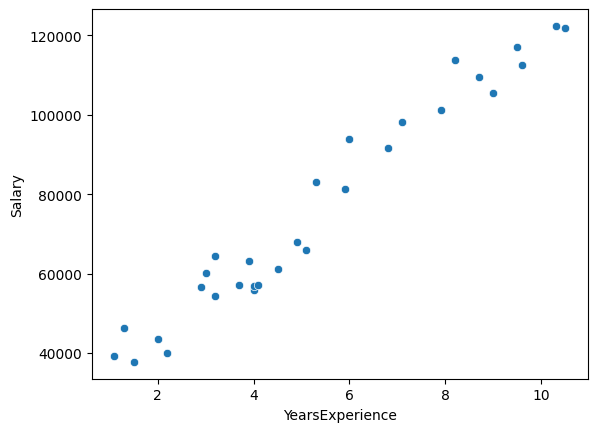

In [5]:
sns.scatterplot(data=df, x='YearsExperience', y='Salary');

In [6]:
X = df[['YearsExperience']]
X[:3]
# df.iloc[:, 0]

,YearsExperience
0,1.1
1,1.3
2,1.5


In [7]:
y = df[['Salary']]
y[:3]

,Salary
0,39343.0
1,46205.0
2,37731.0


In [8]:
from sklearn.linear_model import LinearRegression

# 1. Crear modelo
model = LinearRegression()

# 2. Entrenar el modelo
model.fit(X, y)
# model.fit(df[['YearsExperience']], df['Salary'])

# 3. Predicciones
model.predict([[9]]) #Predicción para 9 años de experiencia

c:\Users\rgs1e\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[101391.89877031]])

In [9]:
# nuevos años de experiencia
X_employees = pd.DataFrame({'YearsExperience': [7.5, 4, 6, 2]})

X_employees['Salary'] = model.predict(X_employees)
X_employees

,YearsExperience,Salary
0,7.5,96666.917610
1,4.0,63592.049484
2,6.0,82491.974127
3,2.0,44692.124842


In [10]:
y = model.intercept_ + model.coef_ * 7.5
y

array([[96666.91760958]])

In [11]:
# concatenar original con las predicciones
df_all = pd.concat([df, X_employees], ignore_index=True)
# df_all.sort_values('YearsExperience')
df_all

,YearsExperience,Salary
0,1.1,39343.000000
1,1.3,46205.000000
2,1.5,37731.000000
3,2.0,43525.000000
4,2.2,39891.000000
5,2.9,56642.000000
6,3.0,60150.000000
7,3.2,54445.000000
8,3.2,64445.000000
9,3.7,57189.000000


In [12]:
X = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

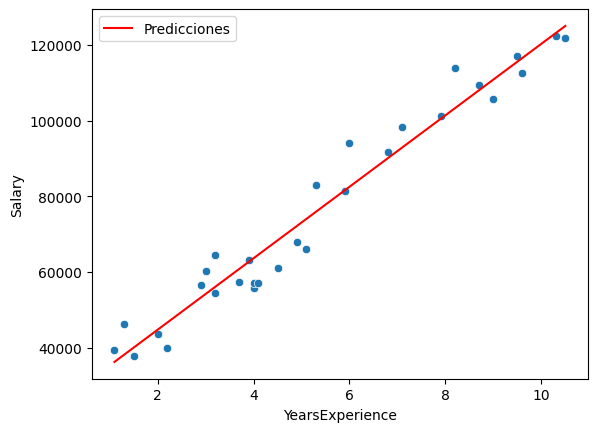

In [13]:
sns.scatterplot(data=df, x='YearsExperience', y=df['Salary'])
sns.lineplot(x=df['YearsExperience'], y=y_pred, color='r', label='Predicciones')

## Particionamiento datos
 
* Entrenamiento: 80 % 
* Validación o test: 20 %

* Posibles combinaciones: 
    * 90 / 10
    * 80 / 20
    * 70 / 30

In [14]:
df = pd.read_csv('../../data/salaries_experience.csv')

In [15]:
X = df[['YearsExperience']] # dataframe, matriz
y = df['Salary'] # serie, vector

In [16]:
from sklearn.model_selection import train_test_split

# 80 %: X_train, y_train
# 20 %: X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape} {y_train.shape}")
print(f"Test: {X_test.shape} {y_test.shape}")

Entrenamiento: (24, 1) (24,)
Test: (6, 1) (6,)


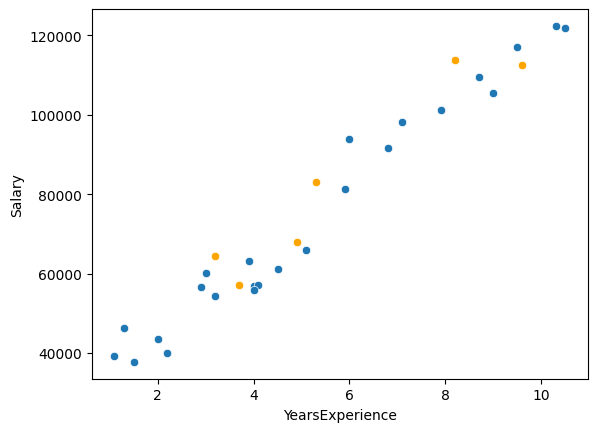

In [17]:
sns.scatterplot(x=X_train['YearsExperience'], y=y_train)
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, c='orange');

In [18]:
model = LinearRegression()
model.fit(X_train, y_train) # datos entrenamiento

LinearRegression()

In [19]:
y_pred = model.predict(X_test) # datos de test

<Axes: xlabel='YearsExperience', ylabel='Salary'>

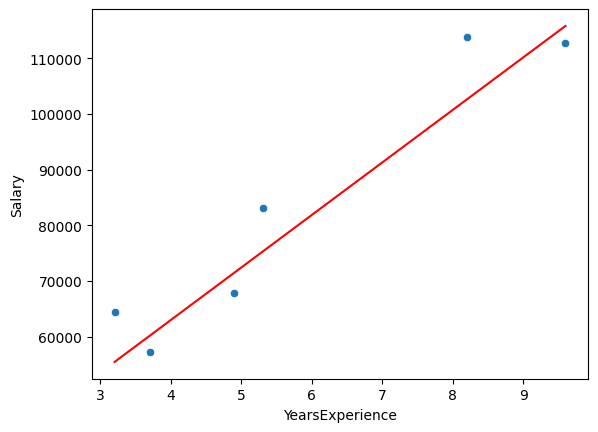

In [20]:
# test vs prediccion
sns.scatterplot(x=X_test['YearsExperience'], y=y_test) # test
sns.lineplot(x=X_test['YearsExperience'], y=y_pred, c='r') # predicciones

# Error

## MAE: Mean Absolute Error

mean_absolute_error()

Es la media del valor absoluto de los errores entre las predicciones y los valores reales. Mide cuánto se desvían en promedio las predicciones del modelo de los valores reales.

Error = y_test - y_pred

In [21]:
from sklearn.metrics import mean_absolute_error

# Posible cantidad de margen de salario que el modelo se equivoca
# Menos es mejor
mean_absolute_error(y_test, y_pred)

6286.453830757749

In [22]:
import numpy as np 

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

mean_absolute_percentage_error(y_test, y_pred)

7.74

## Error MSE y RMSE

MSE: Mean Squared Error o Error Cuadrático Medio

* Mide la diferencia entre los valores reales y los valores predichos por el modelo.
* La diferencia con la MAE es que el MSE toma la media de los cuadrados de los errores.
* MSE eleva al cuadrado los errores antes de hacer la media, lo que significa que da más peso a los errores grandes que a los pequeños.

RMSE: Root Mean Squared Error

* Es la raíz cuadrada del MSE, se usa para que la salida no esté elevada al cuadrado y se pueda interpretar mejor.

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# rmse = np.sqrt(mse)

print(f'mse: {mse}')
print(f'rmse: {rmse}')

mse: 49830096.85590839
rmse: 7059.04362190151
